In [1]:
import numpy as np
import matplotlib.pyplot as plt

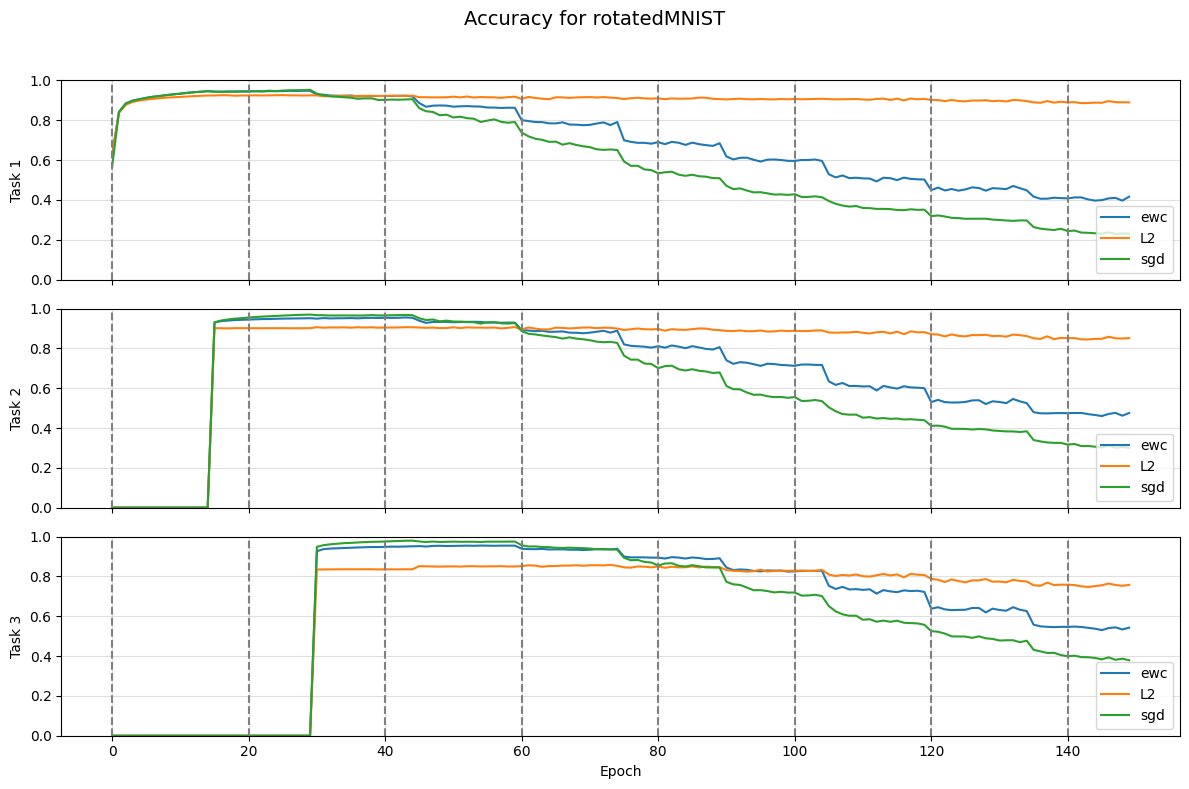

In [ ]:
# Load npz files
ewc_data = np.load(r"C:\Users\Karl\Downloads\results\metrics_rot_ewc.npz")
l2_data = np.load(r"C:\Users\Karl\Downloads\metrics_rot_l2 (1).npz")
sgd_data = np.load(r"C:\Users\Karl\Documents\Karl\EPFL COURS\MA1\Inference and Learning\metrics.npz")

# We put the different methods in a dictionary
metrics = {
    "ewc": ewc_data,
    "L2": l2_data,
    "sgd": sgd_data
}

def plot_fig_2A(metrics, num_epochs, data_set_name):
    n_tasks, total_epochs = 3, 150  # We observe the results for the three first tasks 
    fig, axes = plt.subplots(n_tasks, 1, figsize=(12, 8), sharex=True)

    for i in range(n_tasks):
        for method_name, method_data in metrics.items():
            valid_epochs = np.where(method_data["train_accuracies"][i] >= 0)[0]
            axes[i].plot(valid_epochs, method_data["train_accuracies"][i, valid_epochs], label=method_name, linestyle='-')

        axes[i].vlines(np.arange(0, total_epochs, num_epochs), 0.0, 1.0, linestyles="--", colors="gray")
        axes[i].set_ylabel(f"Task {i + 1}")
        axes[i].legend(loc="lower right", fontsize=10)
        axes[i].set_ylim(0.0, 1.0)
        axes[i].grid(alpha=0.4)

    plt.xlabel("Epoch")
    fig.suptitle(f"Accuracy for {data_set_name}", fontsize=14)
    fig.tight_layout(rect=[0, 0, 1, 0.96])


    plt.savefig(f"Figure_2A_{data_set_name}.png", dpi=300)
    plt.show()

# Plot of the accuracy of rotatedMNIST
plot_fig_2A(metrics, num_epochs=20, data_set_name="rotatedMNIST")
